# Load the zip file and unzip and before check the GPU

In [14]:
# Check the GPU is available or not
# IMPORT
import tensorflow as tf 

# FETCH GPU NAME
device_name = tf.test.gpu_device_name()

# IF DEVICE IS NOT AVAILABLE FETCH ERROR
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [15]:
# IMPORT DEPENDENCIES

import requests, zipfile, io
from glob import glob
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd
seed = 7
import pandas as pd
np.random.seed(seed)
import os

In [16]:
zip_file_url = 'https://github.com/karoldvl/ESC-50/archive/master.zip' # link: ESC-50 Datset

In [4]:
# CREATE FOLDER WITH NAME SOUND IF NOT EXIST
if not os.path.exists('sound'):
    os.makedirs('sound')

In [5]:
# UNZIP THE DATA AND EXTRACT ALL FILES IN THE SOUND FOLDER
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('sound/')
z.close()

In [7]:
# glob('sound/ESC-50-master/audio/*')

# Define a function to covert the image based on calculate log scaled mel-spectrograms and their corresponding deltas from a sound clip.

Regarding fixed size input, we will divide each sound clip into segments of 60x41 (60 rows and 41 columns). The mel-spec and their deltas will become two channels, which we will be fed into CNN

In [23]:
# !pip install librosa
import librosa

In [24]:
# GENERATOR FUNCTION
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)
        print(start)

# EXTRACT THE FEATURE OF SOUND USING MELSPECTROGRAM TECHNIQUE
def extract_features(bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    for fn in tqdm(glob('sound/ESC-50-master/audio/*')):
        sound_clip,s = librosa.load(fn) # 5sec
        sound_clip   = np.concatenate((sound_clip,sound_clip),axis=None) # make it 10s
        label = fn.split("/")[-1].split("-")[-1].split(".")[0]
        for (start,end) in windows(sound_clip,window_size):
            if(len(sound_clip[start:end]) == window_size):
                signal = sound_clip[start:end]
                melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
                logspec = librosa.core.amplitude_to_db(melspec)
                logspec = logspec.T.flatten()[:, np.newaxis].T
                log_specgrams.append(logspec)
                labels.append(label)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), np.array(labels,dtype = np.int)

In [25]:
features,labels = extract_features()




  0%|          | 0/2000 [00:00<?, ?it/s]


  0%|          | 1/2000 [00:00<18:26,  1.81it/s]


  0%|          | 2/2000 [00:01<18:21,  1.81it/s]


  0%|          | 3/2000 [00:01<18:28,  1.80it/s]


  0%|          | 4/2000 [00:02<18:12,  1.83it/s]


  0%|          | 5/2000 [00:02<18:06,  1.84it/s]


  0%|          | 6/2000 [00:03<18:27,  1.80it/s]


  0%|          | 7/2000 [00:03<18:32,  1.79it/s]


  0%|          | 8/2000 [00:04<18:29,  1.80it/s]


  0%|          | 9/2000 [00:05<18:41,  1.78it/s]


  0%|          | 10/2000 [00:05<18:57,  1.75it/s]


  1%|          | 11/2000 [00:06<18:45,  1.77it/s]


  1%|          | 12/2000 [00:06<18:47,  1.76it/s]


  1%|          | 13/2000 [00:07<18:32,  1.79it/s]


  1%|          | 14/2000 [00:07<18:33,  1.78it/s]


  1%|          | 15/2000 [00:08<18:09,  1.82it/s]


  1%|          | 16/2000 [00:08<18:00,  1.84it/s]


  1%|          | 17/2000 [00:09<18:00,  1.83it/s]


  1%|          | 18/2000 [00:10<18:39,  1.77it/s]


  1%|          | 19/2000 [0

  7%|▋         | 134/2000 [01:14<16:38,  1.87it/s]


  7%|▋         | 135/2000 [01:15<16:36,  1.87it/s]


  7%|▋         | 136/2000 [01:15<16:48,  1.85it/s]


  7%|▋         | 137/2000 [01:16<16:32,  1.88it/s]


  7%|▋         | 138/2000 [01:16<16:53,  1.84it/s]


  7%|▋         | 139/2000 [01:17<16:49,  1.84it/s]


  7%|▋         | 140/2000 [01:17<16:57,  1.83it/s]


  7%|▋         | 141/2000 [01:18<16:54,  1.83it/s]


  7%|▋         | 142/2000 [01:19<16:38,  1.86it/s]


  7%|▋         | 143/2000 [01:19<16:22,  1.89it/s]


  7%|▋         | 144/2000 [01:20<16:38,  1.86it/s]


  7%|▋         | 145/2000 [01:20<16:25,  1.88it/s]


  7%|▋         | 146/2000 [01:21<16:24,  1.88it/s]


  7%|▋         | 147/2000 [01:21<16:22,  1.89it/s]


  7%|▋         | 148/2000 [01:22<16:26,  1.88it/s]


  7%|▋         | 149/2000 [01:22<16:37,  1.86it/s]


  8%|▊         | 150/2000 [01:23<16:28,  1.87it/s]


  8%|▊         | 151/2000 [01:23<16:20,  1.89it/s]


  8%|▊         | 152/2000 [01:24<16:31,  1.86i

 13%|█▎        | 266/2000 [02:27<15:50,  1.82it/s]


 13%|█▎        | 267/2000 [02:27<15:49,  1.82it/s]


 13%|█▎        | 268/2000 [02:28<15:44,  1.83it/s]


 13%|█▎        | 269/2000 [02:28<15:43,  1.84it/s]


 14%|█▎        | 270/2000 [02:29<15:46,  1.83it/s]


 14%|█▎        | 271/2000 [02:29<15:51,  1.82it/s]


 14%|█▎        | 272/2000 [02:30<15:53,  1.81it/s]


 14%|█▎        | 273/2000 [02:30<15:45,  1.83it/s]


 14%|█▎        | 274/2000 [02:31<15:47,  1.82it/s]


 14%|█▍        | 275/2000 [02:32<15:55,  1.81it/s]


 14%|█▍        | 276/2000 [02:32<15:58,  1.80it/s]


 14%|█▍        | 277/2000 [02:33<16:13,  1.77it/s]


 14%|█▍        | 278/2000 [02:33<16:03,  1.79it/s]


 14%|█▍        | 279/2000 [02:34<16:01,  1.79it/s]


 14%|█▍        | 280/2000 [02:34<15:56,  1.80it/s]


 14%|█▍        | 281/2000 [02:35<16:06,  1.78it/s]


 14%|█▍        | 282/2000 [02:36<16:09,  1.77it/s]


 14%|█▍        | 283/2000 [02:36<16:12,  1.77it/s]


 14%|█▍        | 284/2000 [02:37<16:02,  1.78i

 20%|█▉        | 398/2000 [03:41<14:56,  1.79it/s]


 20%|█▉        | 399/2000 [03:42<14:55,  1.79it/s]


 20%|██        | 400/2000 [03:42<14:53,  1.79it/s]


 20%|██        | 401/2000 [03:43<14:53,  1.79it/s]


 20%|██        | 402/2000 [03:43<14:42,  1.81it/s]


 20%|██        | 403/2000 [03:44<14:31,  1.83it/s]


 20%|██        | 404/2000 [03:44<14:36,  1.82it/s]


 20%|██        | 405/2000 [03:45<14:43,  1.81it/s]


 20%|██        | 406/2000 [03:45<14:42,  1.81it/s]


 20%|██        | 407/2000 [03:46<14:47,  1.80it/s]


 20%|██        | 408/2000 [03:47<14:52,  1.78it/s]


 20%|██        | 409/2000 [03:47<14:45,  1.80it/s]


 20%|██        | 410/2000 [03:48<14:59,  1.77it/s]


 21%|██        | 411/2000 [03:48<15:02,  1.76it/s]


 21%|██        | 412/2000 [03:49<15:02,  1.76it/s]


 21%|██        | 413/2000 [03:49<14:51,  1.78it/s]


 21%|██        | 414/2000 [03:50<14:48,  1.78it/s]


 21%|██        | 415/2000 [03:50<14:41,  1.80it/s]


 21%|██        | 416/2000 [03:51<14:39,  1.80i

 26%|██▋       | 530/2000 [04:57<14:39,  1.67it/s]


 27%|██▋       | 531/2000 [04:58<14:43,  1.66it/s]


 27%|██▋       | 532/2000 [04:58<14:30,  1.69it/s]


 27%|██▋       | 533/2000 [04:59<14:26,  1.69it/s]


 27%|██▋       | 534/2000 [04:59<14:16,  1.71it/s]


 27%|██▋       | 535/2000 [05:00<14:15,  1.71it/s]


 27%|██▋       | 536/2000 [05:00<14:17,  1.71it/s]


 27%|██▋       | 537/2000 [05:01<14:22,  1.70it/s]


 27%|██▋       | 538/2000 [05:02<14:19,  1.70it/s]


 27%|██▋       | 539/2000 [05:02<14:17,  1.70it/s]


 27%|██▋       | 540/2000 [05:03<14:58,  1.62it/s]


 27%|██▋       | 541/2000 [05:03<14:51,  1.64it/s]


 27%|██▋       | 542/2000 [05:04<14:34,  1.67it/s]


 27%|██▋       | 543/2000 [05:05<14:30,  1.67it/s]


 27%|██▋       | 544/2000 [05:05<14:26,  1.68it/s]


 27%|██▋       | 545/2000 [05:06<14:44,  1.65it/s]


 27%|██▋       | 546/2000 [05:07<14:48,  1.64it/s]


 27%|██▋       | 547/2000 [05:07<14:48,  1.64it/s]


 27%|██▋       | 548/2000 [05:08<14:43,  1.64i

 33%|███▎      | 662/2000 [06:16<14:12,  1.57it/s]


 33%|███▎      | 663/2000 [06:17<14:11,  1.57it/s]


 33%|███▎      | 664/2000 [06:18<13:59,  1.59it/s]


 33%|███▎      | 665/2000 [06:18<14:01,  1.59it/s]


 33%|███▎      | 666/2000 [06:19<13:47,  1.61it/s]


 33%|███▎      | 667/2000 [06:20<13:51,  1.60it/s]


 33%|███▎      | 668/2000 [06:20<13:46,  1.61it/s]


 33%|███▎      | 669/2000 [06:21<13:28,  1.65it/s]


 34%|███▎      | 670/2000 [06:21<13:13,  1.68it/s]


 34%|███▎      | 671/2000 [06:22<13:09,  1.68it/s]


 34%|███▎      | 672/2000 [06:22<13:07,  1.69it/s]


 34%|███▎      | 673/2000 [06:23<13:09,  1.68it/s]


 34%|███▎      | 674/2000 [06:24<13:11,  1.67it/s]


 34%|███▍      | 675/2000 [06:24<13:02,  1.69it/s]


 34%|███▍      | 676/2000 [06:25<12:58,  1.70it/s]


 34%|███▍      | 677/2000 [06:25<13:03,  1.69it/s]


 34%|███▍      | 678/2000 [06:26<13:03,  1.69it/s]


 34%|███▍      | 679/2000 [06:27<13:12,  1.67it/s]


 34%|███▍      | 680/2000 [06:27<13:10,  1.67i

 40%|███▉      | 794/2000 [07:36<12:13,  1.64it/s]


 40%|███▉      | 795/2000 [07:36<12:06,  1.66it/s]


 40%|███▉      | 796/2000 [07:37<12:09,  1.65it/s]


 40%|███▉      | 797/2000 [07:38<12:08,  1.65it/s]


 40%|███▉      | 798/2000 [07:38<12:03,  1.66it/s]


 40%|███▉      | 799/2000 [07:39<12:04,  1.66it/s]


 40%|████      | 800/2000 [07:39<12:00,  1.67it/s]


 40%|████      | 801/2000 [07:40<11:52,  1.68it/s]


 40%|████      | 802/2000 [07:41<11:56,  1.67it/s]


 40%|████      | 803/2000 [07:41<11:55,  1.67it/s]


 40%|████      | 804/2000 [07:42<11:59,  1.66it/s]


 40%|████      | 805/2000 [07:42<11:53,  1.67it/s]


 40%|████      | 806/2000 [07:43<12:00,  1.66it/s]


 40%|████      | 807/2000 [07:44<11:50,  1.68it/s]


 40%|████      | 808/2000 [07:44<11:46,  1.69it/s]


 40%|████      | 809/2000 [07:45<11:53,  1.67it/s]


 40%|████      | 810/2000 [07:45<11:57,  1.66it/s]


 41%|████      | 811/2000 [07:46<11:47,  1.68it/s]


 41%|████      | 812/2000 [07:47<11:54,  1.66i

 46%|████▋     | 926/2000 [08:56<11:07,  1.61it/s]


 46%|████▋     | 927/2000 [08:57<11:02,  1.62it/s]


 46%|████▋     | 928/2000 [08:57<11:01,  1.62it/s]


 46%|████▋     | 929/2000 [08:58<10:58,  1.63it/s]


 46%|████▋     | 930/2000 [08:58<10:51,  1.64it/s]


 47%|████▋     | 931/2000 [08:59<10:58,  1.62it/s]


 47%|████▋     | 932/2000 [09:00<10:56,  1.63it/s]


 47%|████▋     | 933/2000 [09:00<10:58,  1.62it/s]


 47%|████▋     | 934/2000 [09:01<10:47,  1.65it/s]


 47%|████▋     | 935/2000 [09:01<10:48,  1.64it/s]


 47%|████▋     | 936/2000 [09:02<10:44,  1.65it/s]


 47%|████▋     | 937/2000 [09:03<10:47,  1.64it/s]


 47%|████▋     | 938/2000 [09:03<10:55,  1.62it/s]


 47%|████▋     | 939/2000 [09:04<10:58,  1.61it/s]


 47%|████▋     | 940/2000 [09:05<11:01,  1.60it/s]


 47%|████▋     | 941/2000 [09:05<11:01,  1.60it/s]


 47%|████▋     | 942/2000 [09:06<10:51,  1.62it/s]


 47%|████▋     | 943/2000 [09:06<10:55,  1.61it/s]


 47%|████▋     | 944/2000 [09:07<10:58,  1.60i

 53%|█████▎    | 1057/2000 [10:18<09:59,  1.57it/s]


 53%|█████▎    | 1058/2000 [10:19<09:58,  1.57it/s]


 53%|█████▎    | 1059/2000 [10:19<09:55,  1.58it/s]


 53%|█████▎    | 1060/2000 [10:20<10:01,  1.56it/s]


 53%|█████▎    | 1061/2000 [10:21<10:00,  1.56it/s]


 53%|█████▎    | 1062/2000 [10:21<09:51,  1.59it/s]


 53%|█████▎    | 1063/2000 [10:22<09:46,  1.60it/s]


 53%|█████▎    | 1064/2000 [10:23<10:14,  1.52it/s]


 53%|█████▎    | 1065/2000 [10:23<10:11,  1.53it/s]


 53%|█████▎    | 1066/2000 [10:24<10:13,  1.52it/s]


 53%|█████▎    | 1067/2000 [10:25<10:10,  1.53it/s]


 53%|█████▎    | 1068/2000 [10:25<10:01,  1.55it/s]


 53%|█████▎    | 1069/2000 [10:26<09:54,  1.57it/s]


 54%|█████▎    | 1070/2000 [10:26<09:48,  1.58it/s]


 54%|█████▎    | 1071/2000 [10:27<09:58,  1.55it/s]


 54%|█████▎    | 1072/2000 [10:28<09:48,  1.58it/s]


 54%|█████▎    | 1073/2000 [10:28<09:56,  1.55it/s]


 54%|█████▎    | 1074/2000 [10:29<10:00,  1.54it/s]


 54%|█████▍    | 1075/2000 [

 59%|█████▉    | 1187/2000 [11:41<08:36,  1.58it/s]


 59%|█████▉    | 1188/2000 [11:42<08:29,  1.59it/s]


 59%|█████▉    | 1189/2000 [11:42<08:21,  1.62it/s]


 60%|█████▉    | 1190/2000 [11:43<08:26,  1.60it/s]


 60%|█████▉    | 1191/2000 [11:44<08:26,  1.60it/s]


 60%|█████▉    | 1192/2000 [11:44<08:20,  1.61it/s]


 60%|█████▉    | 1193/2000 [11:45<08:23,  1.60it/s]


 60%|█████▉    | 1194/2000 [11:45<08:23,  1.60it/s]


 60%|█████▉    | 1195/2000 [11:46<08:27,  1.59it/s]


 60%|█████▉    | 1196/2000 [11:47<08:20,  1.61it/s]


 60%|█████▉    | 1197/2000 [11:47<08:21,  1.60it/s]


 60%|█████▉    | 1198/2000 [11:48<08:14,  1.62it/s]


 60%|█████▉    | 1199/2000 [11:49<08:18,  1.61it/s]


 60%|██████    | 1200/2000 [11:49<08:16,  1.61it/s]


 60%|██████    | 1201/2000 [11:50<08:19,  1.60it/s]


 60%|██████    | 1202/2000 [11:51<08:38,  1.54it/s]


 60%|██████    | 1203/2000 [11:51<08:28,  1.57it/s]


 60%|██████    | 1204/2000 [11:52<08:19,  1.59it/s]


 60%|██████    | 1205/2000 [

 66%|██████▌   | 1317/2000 [13:04<07:19,  1.55it/s]


 66%|██████▌   | 1318/2000 [13:05<07:19,  1.55it/s]


 66%|██████▌   | 1319/2000 [13:06<07:23,  1.53it/s]


 66%|██████▌   | 1320/2000 [13:06<07:20,  1.54it/s]


 66%|██████▌   | 1321/2000 [13:07<07:24,  1.53it/s]


 66%|██████▌   | 1322/2000 [13:07<07:15,  1.56it/s]


 66%|██████▌   | 1323/2000 [13:08<07:07,  1.58it/s]


 66%|██████▌   | 1324/2000 [13:09<07:09,  1.57it/s]


 66%|██████▋   | 1325/2000 [13:09<07:05,  1.59it/s]


 66%|██████▋   | 1326/2000 [13:10<07:07,  1.57it/s]


 66%|██████▋   | 1327/2000 [13:11<07:14,  1.55it/s]


 66%|██████▋   | 1328/2000 [13:11<07:12,  1.55it/s]


 66%|██████▋   | 1329/2000 [13:12<07:06,  1.57it/s]


 66%|██████▋   | 1330/2000 [13:13<07:17,  1.53it/s]


 67%|██████▋   | 1331/2000 [13:13<07:14,  1.54it/s]


 67%|██████▋   | 1332/2000 [13:14<07:18,  1.52it/s]


 67%|██████▋   | 1333/2000 [13:15<07:17,  1.53it/s]


 67%|██████▋   | 1334/2000 [13:15<07:21,  1.51it/s]


 67%|██████▋   | 1335/2000 [

 72%|███████▏  | 1447/2000 [14:29<06:03,  1.52it/s]


 72%|███████▏  | 1448/2000 [14:29<05:59,  1.54it/s]


 72%|███████▏  | 1449/2000 [14:30<05:56,  1.54it/s]


 72%|███████▎  | 1450/2000 [14:31<05:57,  1.54it/s]


 73%|███████▎  | 1451/2000 [14:31<05:58,  1.53it/s]


 73%|███████▎  | 1452/2000 [14:32<05:55,  1.54it/s]


 73%|███████▎  | 1453/2000 [14:33<05:57,  1.53it/s]


 73%|███████▎  | 1454/2000 [14:33<06:05,  1.49it/s]


 73%|███████▎  | 1455/2000 [14:34<06:10,  1.47it/s]


 73%|███████▎  | 1456/2000 [14:35<06:03,  1.50it/s]


 73%|███████▎  | 1457/2000 [14:35<06:01,  1.50it/s]


 73%|███████▎  | 1458/2000 [14:36<06:01,  1.50it/s]


 73%|███████▎  | 1459/2000 [14:37<05:59,  1.50it/s]


 73%|███████▎  | 1460/2000 [14:37<05:56,  1.51it/s]


 73%|███████▎  | 1461/2000 [14:38<06:00,  1.50it/s]


 73%|███████▎  | 1462/2000 [14:39<05:58,  1.50it/s]


 73%|███████▎  | 1463/2000 [14:39<05:53,  1.52it/s]


 73%|███████▎  | 1464/2000 [14:40<05:51,  1.53it/s]


 73%|███████▎  | 1465/2000 [

 79%|███████▉  | 1577/2000 [15:56<04:48,  1.46it/s]


 79%|███████▉  | 1578/2000 [15:57<04:46,  1.47it/s]


 79%|███████▉  | 1579/2000 [15:57<04:46,  1.47it/s]


 79%|███████▉  | 1580/2000 [15:58<04:44,  1.48it/s]


 79%|███████▉  | 1581/2000 [15:59<04:41,  1.49it/s]


 79%|███████▉  | 1582/2000 [15:59<04:36,  1.51it/s]


 79%|███████▉  | 1583/2000 [16:00<04:34,  1.52it/s]


 79%|███████▉  | 1584/2000 [16:01<04:33,  1.52it/s]


 79%|███████▉  | 1585/2000 [16:01<04:34,  1.51it/s]


 79%|███████▉  | 1586/2000 [16:02<04:32,  1.52it/s]


 79%|███████▉  | 1587/2000 [16:03<04:32,  1.52it/s]


 79%|███████▉  | 1588/2000 [16:03<04:33,  1.51it/s]


 79%|███████▉  | 1589/2000 [16:04<04:35,  1.49it/s]


 80%|███████▉  | 1590/2000 [16:05<04:29,  1.52it/s]


 80%|███████▉  | 1591/2000 [16:05<04:32,  1.50it/s]


 80%|███████▉  | 1592/2000 [16:06<04:31,  1.50it/s]


 80%|███████▉  | 1593/2000 [16:07<04:32,  1.49it/s]


 80%|███████▉  | 1594/2000 [16:07<04:30,  1.50it/s]


 80%|███████▉  | 1595/2000 [

 85%|████████▌ | 1707/2000 [17:25<03:29,  1.40it/s]


 85%|████████▌ | 1708/2000 [17:26<03:29,  1.40it/s]


 85%|████████▌ | 1709/2000 [17:26<03:25,  1.41it/s]


 86%|████████▌ | 1710/2000 [17:27<03:25,  1.41it/s]


 86%|████████▌ | 1711/2000 [17:28<03:23,  1.42it/s]


 86%|████████▌ | 1712/2000 [17:28<03:23,  1.41it/s]


 86%|████████▌ | 1713/2000 [17:29<03:18,  1.44it/s]


 86%|████████▌ | 1714/2000 [17:30<03:16,  1.45it/s]


 86%|████████▌ | 1715/2000 [17:30<03:16,  1.45it/s]


 86%|████████▌ | 1716/2000 [17:31<03:13,  1.47it/s]


 86%|████████▌ | 1717/2000 [17:32<03:13,  1.46it/s]


 86%|████████▌ | 1718/2000 [17:32<03:13,  1.46it/s]


 86%|████████▌ | 1719/2000 [17:33<03:16,  1.43it/s]


 86%|████████▌ | 1720/2000 [17:34<03:14,  1.44it/s]


 86%|████████▌ | 1721/2000 [17:35<03:11,  1.45it/s]


 86%|████████▌ | 1722/2000 [17:35<03:09,  1.46it/s]


 86%|████████▌ | 1723/2000 [17:36<03:05,  1.49it/s]


 86%|████████▌ | 1724/2000 [17:37<03:05,  1.49it/s]


 86%|████████▋ | 1725/2000 [

 92%|█████████▏| 1837/2000 [18:55<01:54,  1.43it/s]


 92%|█████████▏| 1838/2000 [18:55<01:54,  1.42it/s]


 92%|█████████▏| 1839/2000 [18:56<01:53,  1.41it/s]


 92%|█████████▏| 1840/2000 [18:57<01:54,  1.40it/s]


 92%|█████████▏| 1841/2000 [18:58<01:54,  1.39it/s]


 92%|█████████▏| 1842/2000 [18:58<01:52,  1.41it/s]


 92%|█████████▏| 1843/2000 [18:59<01:52,  1.40it/s]


 92%|█████████▏| 1844/2000 [19:00<01:51,  1.40it/s]


 92%|█████████▏| 1845/2000 [19:00<01:51,  1.39it/s]


 92%|█████████▏| 1846/2000 [19:01<01:49,  1.41it/s]


 92%|█████████▏| 1847/2000 [19:02<01:48,  1.41it/s]


 92%|█████████▏| 1848/2000 [19:03<01:46,  1.43it/s]


 92%|█████████▏| 1849/2000 [19:03<01:45,  1.44it/s]


 92%|█████████▎| 1850/2000 [19:04<01:45,  1.42it/s]


 93%|█████████▎| 1851/2000 [19:05<01:45,  1.42it/s]


 93%|█████████▎| 1852/2000 [19:05<01:43,  1.43it/s]


 93%|█████████▎| 1853/2000 [19:06<01:44,  1.41it/s]


 93%|█████████▎| 1854/2000 [19:07<01:43,  1.41it/s]


 93%|█████████▎| 1855/2000 [

 98%|█████████▊| 1967/2000 [20:29<00:24,  1.36it/s]


 98%|█████████▊| 1968/2000 [20:30<00:23,  1.36it/s]


 98%|█████████▊| 1969/2000 [20:31<00:23,  1.35it/s]


 98%|█████████▊| 1970/2000 [20:32<00:21,  1.37it/s]


 99%|█████████▊| 1971/2000 [20:32<00:21,  1.37it/s]


 99%|█████████▊| 1972/2000 [20:33<00:20,  1.33it/s]


 99%|█████████▊| 1973/2000 [20:34<00:20,  1.33it/s]


 99%|█████████▊| 1974/2000 [20:35<00:19,  1.33it/s]


 99%|█████████▉| 1975/2000 [20:35<00:18,  1.34it/s]


 99%|█████████▉| 1976/2000 [20:36<00:17,  1.35it/s]


 99%|█████████▉| 1977/2000 [20:37<00:17,  1.34it/s]


 99%|█████████▉| 1978/2000 [20:38<00:16,  1.35it/s]


 99%|█████████▉| 1979/2000 [20:38<00:15,  1.35it/s]


 99%|█████████▉| 1980/2000 [20:39<00:14,  1.34it/s]


 99%|█████████▉| 1981/2000 [20:40<00:14,  1.35it/s]


 99%|█████████▉| 1982/2000 [20:41<00:13,  1.36it/s]


 99%|█████████▉| 1983/2000 [20:41<00:12,  1.36it/s]


 99%|█████████▉| 1984/2000 [20:42<00:11,  1.36it/s]


 99%|█████████▉| 1985/2000 [

In [27]:
# label category names
df = pd.read_csv(glob('sound/ESC-50-master/meta/esc50.csv')[0])
df = df[['target','category']]
df = df.drop_duplicates().reset_index(drop=True)
df = df.sort_values(by=['target']).reset_index(drop=True)
df.head()

,target,category
0,0,dog
1,1,rooster
2,2,pig
3,3,cow
4,4,frog


In [28]:
my_dict = {}
for i in range(len(df)):
    my_dict[df['target'][i]] = df['category'][i]
my_dict

{0: 'dog',
 1: 'rooster',
 2: 'pig',
 3: 'cow',
 4: 'frog',
 5: 'cat',
 6: 'hen',
 7: 'insects',
 8: 'sheep',
 9: 'crow',
 10: 'rain',
 11: 'sea_waves',
 12: 'crackling_fire',
 13: 'crickets',
 14: 'chirping_birds',
 15: 'water_drops',
 16: 'wind',
 17: 'pouring_water',
 18: 'toilet_flush',
 19: 'thunderstorm',
 20: 'crying_baby',
 21: 'sneezing',
 22: 'clapping',
 23: 'breathing',
 24: 'coughing',
 25: 'footsteps',
 26: 'laughing',
 27: 'brushing_teeth',
 28: 'snoring',
 29: 'drinking_sipping',
 30: 'door_wood_knock',
 31: 'mouse_click',
 32: 'keyboard_typing',
 33: 'door_wood_creaks',
 34: 'can_opening',
 35: 'washing_machine',
 36: 'vacuum_cleaner',
 37: 'clock_alarm',
 38: 'clock_tick',
 39: 'glass_breaking',
 40: 'helicopter',
 41: 'chainsaw',
 42: 'siren',
 43: 'car_horn',
 44: 'engine',
 45: 'train',
 46: 'church_bells',
 47: 'airplane',
 48: 'fireworks',
 49: 'hand_saw'}

In [29]:
seed = 4
rng = np.random.RandomState(seed)
from keras.utils import to_categorical

Using TensorFlow backend.


In [30]:
onehot_labels = to_categorical(labels,num_classes=50)

In [31]:
# Create train test Dataset

rnd_indices = np.random.rand(len(labels)) < 0.70

X_train = features[rnd_indices]
y_train = onehot_labels[rnd_indices]
X_test  = features[~rnd_indices]
y_test  = onehot_labels[~rnd_indices]

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27998, 60, 41, 2), (27998, 50), (12002, 60, 41, 2), (12002, 50))

# CNN Model

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten,InputLayer
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras.initializers import normal, VarianceScaling
from keras import initializers
from keras.layers import BatchNormalization
### initializer of weights
# initializer = normal(mean=0, stddev=0.01, seed=13)
# initializer = VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)

In [41]:
def basemodel():
    model = Sequential()
    model.add(Conv2D(32, (2, 2), input_shape=(60,41,2), activation='relu', padding='same', kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None), bias_initializer='ones'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='softmax'))
    
    # Compile model
    epochs, lrate = 25, 0.01
    decay = lrate/epochs
    
#     sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False)
#     rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [42]:
if not os.path.exists('model'):
    os.makedirs('model')
    
filepath="model/weights_0.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [43]:
model = basemodel()
# model.load_weights('./model/weights_0.best.hdf5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 60, 41, 32)        288       
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 41, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 41, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 41, 32)        4128      
_________________________________________________________________
batch_normalization_11 (Batc (None, 60, 41, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 21, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 21, 64)        8256      
__________

# Training with Data Augmentation

One of the major reasons for overfitting is that we don’t have enough data to train our network. Apart from regularization, another very effective way to counter Overfitting is Data Augmentation. It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image. It can be a tedious task but fortunately, this can be done in Keras using the ImageDataGenerator instance.

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen = ImageDataGenerator(
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False  # randomly flip images
          )

In [46]:
# init the batch size and epochs

'''
Note: Due to Memory Error like Buffered data was truncated after reaching the output size limit. What i did is that Save the model in for example 60th epoch and close current program and run new program and restore saved model and train model from 61 epoch to 120 epoch and 
save that and close program and repeat this work for your interested epoch For this [100,50] three times repeat 

'''
batch_size = 50
epochs = 100

In [47]:
# fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1,callbacks=callbacks_list)
 

Epoch 1/100
560/560 [==============================] - 27s 49ms/step - loss: 3.3588 - acc: 0.1417 - val_loss: 3.4311 - val_acc: 0.1924

Epoch 00001: val_acc improved from -inf to 0.19238, saving model to model/weights_0.best.hdf5
Epoch 2/100
560/560 [==============================] - 24s 42ms/step - loss: 2.6006 - acc: 0.2728 - val_loss: 2.5335 - val_acc: 0.3145

Epoch 00002: val_acc improved from 0.19238 to 0.31453, saving model to model/weights_0.best.hdf5
Epoch 3/100
560/560 [==============================] - 24s 42ms/step - loss: 2.2632 - acc: 0.3495 - val_loss: 2.1884 - val_acc: 0.3629

Epoch 00003: val_acc improved from 0.31453 to 0.36286, saving model to model/weights_0.best.hdf5
Epoch 4/100
560/560 [==============================] - 24s 42ms/step - loss: 2.0202 - acc: 0.4079 - val_loss: 2.1522 - val_acc: 0.4038

Epoch 00004: val_acc improved from 0.36286 to 0.40385, saving model to model/weights_0.best.hdf5
Epoch 5/100
560/560 [==============================] - 24s 43ms/step - 

560/560 [==============================] - 24s 42ms/step - loss: 0.6736 - acc: 0.7958 - val_loss: 0.9735 - val_acc: 0.7216

Epoch 00040: val_acc did not improve from 0.73129
Epoch 41/100
560/560 [==============================] - 23s 41ms/step - loss: 0.6637 - acc: 0.7978 - val_loss: 0.9723 - val_acc: 0.7199

Epoch 00041: val_acc did not improve from 0.73129
Epoch 42/100
560/560 [==============================] - 23s 42ms/step - loss: 0.6602 - acc: 0.7997 - val_loss: 0.9371 - val_acc: 0.7278

Epoch 00042: val_acc did not improve from 0.73129
Epoch 43/100
560/560 [==============================] - 24s 42ms/step - loss: 0.6537 - acc: 0.8012 - val_loss: 0.9388 - val_acc: 0.7245

Epoch 00043: val_acc did not improve from 0.73129
Epoch 44/100
560/560 [==============================] - 23s 41ms/step - loss: 0.6415 - acc: 0.8067 - val_loss: 0.9399 - val_acc: 0.7283

Epoch 00044: val_acc did not improve from 0.73129
Epoch 45/100
560/560 [==============================] - 23s 41ms/step - loss: 

560/560 [==============================] - 23s 41ms/step - loss: 0.5100 - acc: 0.8473 - val_loss: 0.8105 - val_acc: 0.7700

Epoch 00081: val_acc improved from 0.76829 to 0.76996, saving model to model/weights_0.best.hdf5
Epoch 82/100
560/560 [==============================] - 23s 41ms/step - loss: 0.5069 - acc: 0.8453 - val_loss: 0.8328 - val_acc: 0.7653

Epoch 00082: val_acc did not improve from 0.76996
Epoch 83/100
560/560 [==============================] - 23s 41ms/step - loss: 0.5027 - acc: 0.8471 - val_loss: 0.8437 - val_acc: 0.7562

Epoch 00083: val_acc did not improve from 0.76996
Epoch 84/100
560/560 [==============================] - 23s 41ms/step - loss: 0.4989 - acc: 0.8508 - val_loss: 0.8626 - val_acc: 0.7563

Epoch 00084: val_acc did not improve from 0.76996
Epoch 85/100
560/560 [==============================] - 23s 41ms/step - loss: 0.5009 - acc: 0.8484 - val_loss: 0.8206 - val_acc: 0.7659

Epoch 00085: val_acc did not improve from 0.76996
Epoch 86/100
560/560 [=========

Note: Due to Memory Error like Buffered data was truncated after reaching the output size limit.
What i did is that Save the model in for example 60th epoch and close current program and run new program and restore saved model and train model from 61 epoch to 120 epoch and save that and close program and repeat this work for your interested epoch 
For this [100,50] three times repeat 


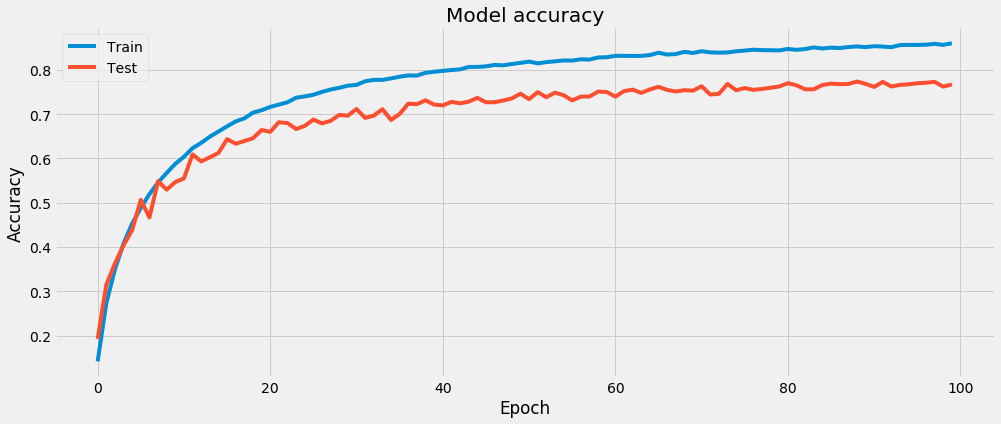

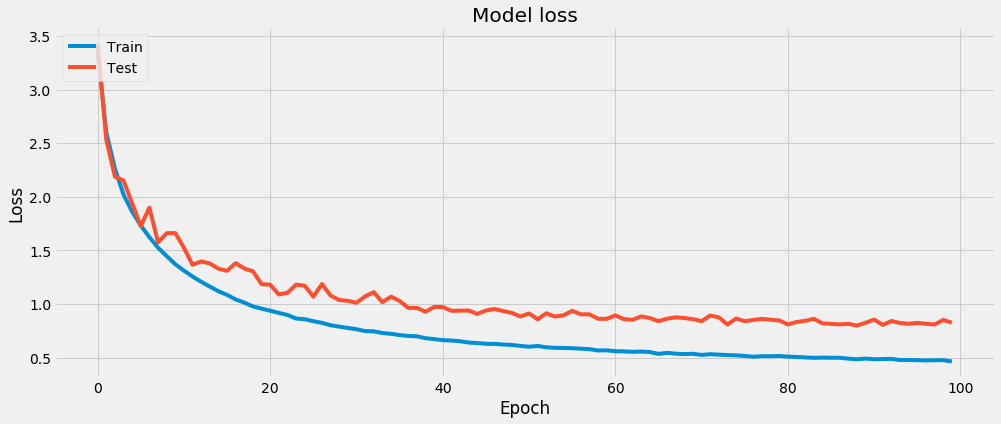

In [48]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Plot training & validation accuracy values
plt.figure(figsize=(15,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [49]:
# evaluate model
model.evaluate(X_test, y_test)

12002/12002 [==============================] - 2s 163us/step


[0.8268681080869733, 0.7671221463089485]

# Classification Report and Confusion Matrix

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
y_pred = model.predict_classes(X_test)

In [52]:
target_name = np.array(df['category'])

In [53]:
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

                  precision    recall  f1-score   support

             dog       0.71      0.75      0.73       234
         rooster       0.74      0.44      0.55       231
             pig       0.95      0.70      0.81       227
             cow       0.70      0.70      0.70       231
            frog       0.97      0.94      0.96       229
             cat       0.60      0.71      0.65       232
             hen       0.83      0.68      0.75       234
         insects       0.82      0.84      0.83       228
           sheep       0.85      0.84      0.85       226
            crow       0.88      0.91      0.89       264
            rain       0.97      0.97      0.97       237
       sea_waves       0.85      0.90      0.88       258
  crackling_fire       0.91      0.82      0.87       243
        crickets       0.92      0.98      0.95       266
  chirping_birds       0.92      0.81      0.86       226
     water_drops       0.75      0.54      0.63       252
            w

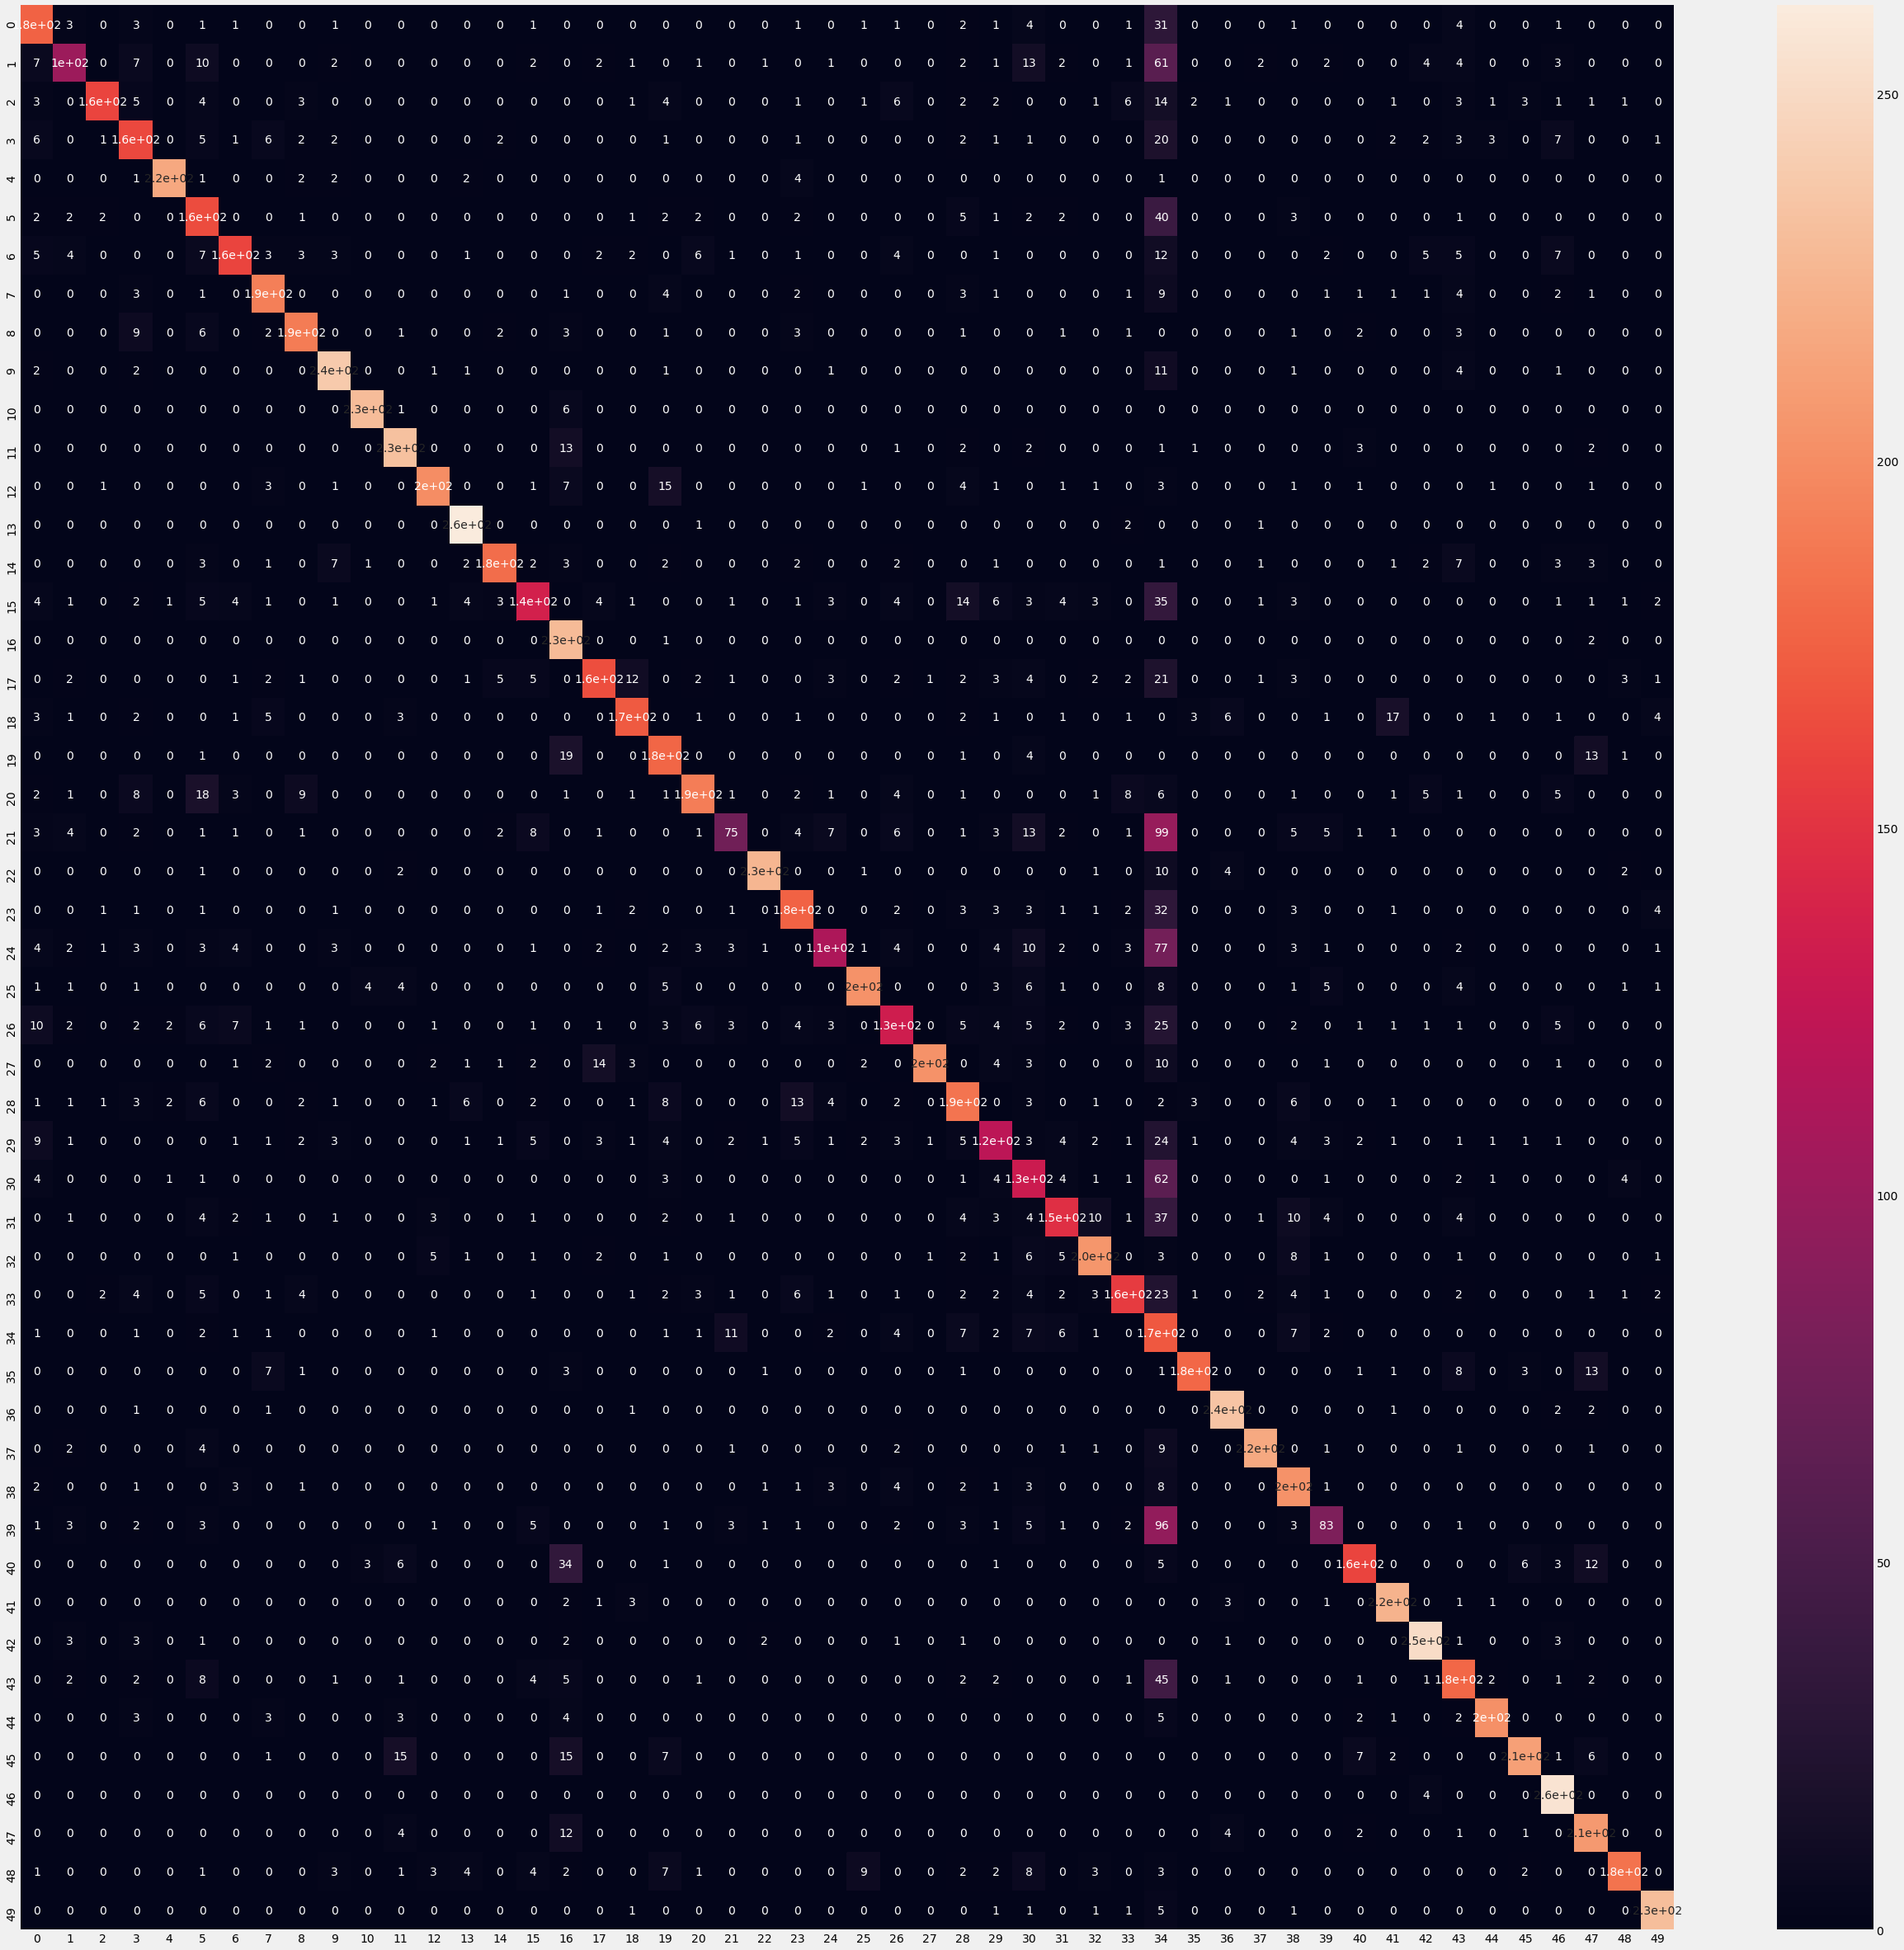

In [54]:
import seaborn as sns
cn_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
plt.figure(figsize = (40,40))
sns.heatmap(cn_matrix, annot=True)